## Predictive Analysis of Cardiovascular Disease Using Python

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import math 
import sklearn as sks
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv('heart_data.csv')
df.head()

,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        70000 non-null  int64  
 1   id           70000 non-null  int64  
 2   age          70000 non-null  int64  
 3   gender       70000 non-null  int64  
 4   height       70000 non-null  int64  
 5   weight       70000 non-null  float64
 6   ap_hi        70000 non-null  int64  
 7   ap_lo        70000 non-null  int64  
 8   cholesterol  70000 non-null  int64  
 9   gluc         70000 non-null  int64  
 10  smoke        70000 non-null  int64  
 11  alco         70000 non-null  int64  
 12  active       70000 non-null  int64  
 13  cardio       70000 non-null  int64  
dtypes: float64(1), int64(13)
memory usage: 7.5 MB


In [4]:
df.shape

(70000, 14)

In [5]:
df = df.drop(columns=['index','id'])
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [6]:
#converting the age column from days to years
df['age'] = df['age'] // 365
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,47,1,156,56.0,100,60,1,1,0,0,0,0


In [7]:
#Creating a column to track BMI
df['bmi'] = round(df['weight'] / ((df['height'] / 100)** 2),2)
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,50,2,168,62.0,110,80,1,1,0,0,1,0,21.97
1,55,1,156,85.0,140,90,3,1,0,0,1,1,34.93
2,51,1,165,64.0,130,70,3,1,0,0,0,1,23.51
3,48,2,169,82.0,150,100,1,1,0,0,1,1,28.71
4,47,1,156,56.0,100,60,1,1,0,0,0,0,23.01


In [8]:
#looking into irregular diastolic levels in the dataset
irregular_diastolic = df.loc[(df['ap_lo'] < 40) | (df['ap_lo'] > 140), 'ap_lo']
print(irregular_diastolic.shape[0])

1042


In [9]:
#removing those irregular diastolic values from the dataset
df = df.loc[(df['ap_lo'] >= 40) & (df['ap_lo'] <= 140)]

In [10]:
#seeing how many irregular systolic entries there are in the dataset
irregular_systolic = df.loc[(df['ap_hi'] < 70) | (df['ap_hi'] > 200), 'ap_hi']
print(irregular_systolic.shape[0])

262


In [11]:
#removing those irregular systolic values from the dataset
df = df.loc[(df['ap_hi'] >= 70) & (df['ap_hi'] <= 200)]

In [12]:
#Looking into missing values within the dataset
df.isna().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
bmi            0
dtype: int64

In [13]:
#Looking at the statistical description of the dataset
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
count,68696.000000,68696.000000,68696.000000,68696.000000,68696.000000,68696.000000,68696.000000,68696.000000,68696.000000,68696.00000,68696.000000,68696.000000,68696.000000
mean,52.826584,1.348623,164.359613,74.110596,126.548023,81.323469,1.364388,1.225748,0.088011,0.05354,0.803380,0.494541,27.519197
std,6.770112,0.476538,8.184212,14.323635,16.558545,9.478925,0.678779,0.571735,0.283313,0.22511,0.397445,0.499974,6.048810
min,29.000000,1.000000,55.000000,11.000000,70.000000,40.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,3.470000
25%,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.00000,1.000000,0.000000,23.880000
50%,53.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.00000,1.000000,0.000000,26.350000
75%,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.00000,1.000000,1.000000,30.120000
max,64.000000,2.000000,250.000000,200.000000,200.000000,140.000000,3.000000,3.000000,1.000000,1.00000,1.000000,1.000000,298.670000


In [14]:
#gender is represented in 1 and 2, mapping to make it 0 and 1
df['gender'] = df['gender'].map({1: 0, 2: 1})

In [15]:
#function that will delete outliers from the input of a dataframe and column
def delete_outliers(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print(lower_bound, upper_bound)

    outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]
    num_outliers = outliers.shape[0]
    print(f"There are {num_outliers} outliers in {column_name}")
    
    # filtering out outliers and return the filtered df
    filtered_df = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
    return filtered_df

In [16]:
#exploring the outliers in age
delete_outliers(df,'age')
delete_outliers(df,'weight')
delete_outliers(df,'height')
delete_outliers(df,'bmi')

33.0 73.0
There are 4 outliers in age
39.5 107.5
There are 1741 outliers in weight
142.5 186.5
There are 507 outliers in height
14.519999999999996 39.480000000000004
There are 2020 outliers in bmi


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,50,1,168,62.0,110,80,1,1,0,0,1,0,21.97
1,55,0,156,85.0,140,90,3,1,0,0,1,1,34.93
2,51,0,165,64.0,130,70,3,1,0,0,0,1,23.51
3,48,1,169,82.0,150,100,1,1,0,0,1,1,28.71
4,47,0,156,56.0,100,60,1,1,0,0,0,0,23.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,57,0,165,80.0,150,80,1,1,0,0,1,1,29.38
69995,52,1,168,76.0,120,80,1,1,1,0,1,0,26.93
69997,52,1,183,105.0,180,90,3,1,0,1,0,1,31.35
69998,61,0,163,72.0,135,80,1,2,0,0,0,1,27.10


In [17]:
#using the delete outliers function to delete outliers of the bmi
df = delete_outliers(df, 'bmi')

14.519999999999996 39.480000000000004
There are 2020 outliers in bmi


In [18]:
#looking at the updated shape
df.shape

(66676, 13)

In [19]:
df['cardio'].value_counts()

cardio
0    34090
1    32586
Name: count, dtype: int64

In [20]:
df['smoke'].value_counts()

smoke
0    60736
1     5940
Name: count, dtype: int64

In [21]:
df['active'].value_counts()

active
1    53624
0    13052
Name: count, dtype: int64

In [22]:
df['alco'].value_counts()

alco
0    63111
1     3565
Name: count, dtype: int64

In [23]:
df['gluc'].value_counts()

gluc
1    56946
3     4963
2     4767
Name: count, dtype: int64

In [24]:
df['cholesterol'].value_counts()

cholesterol
1    50342
2     8909
3     7425
Name: count, dtype: int64

In [25]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
count,66676.000000,66676.000000,66676.000000,66676.000000,66676.000000,66676.000000,66676.000000,66676.000000,66676.000000,66676.000000,66676.000000,66676.000000,66676.000000
mean,52.799028,0.355000,164.578184,73.032593,126.236277,81.168801,1.356335,1.220364,0.089088,0.053468,0.804247,0.488722,26.972406
std,6.776008,0.478517,7.801685,12.708398,16.386771,9.401935,0.672373,0.566284,0.284872,0.224966,0.396782,0.499877,4.409611
min,29.000000,0.000000,120.000000,28.000000,70.000000,40.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,14.520000
25%,48.000000,0.000000,159.000000,64.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,23.810000
50%,53.000000,0.000000,165.000000,71.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,26.170000
75%,58.000000,1.000000,170.000000,80.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,29.740000
max,64.000000,1.000000,207.000000,135.000000,200.000000,140.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,39.480000


## Exploratory Data Analysis - Visuals

###

c:\Users\typjo\anaconda3\envs\DS160\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\typjo\anaconda3\envs\DS160\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\typjo\anaconda3\envs\DS160\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


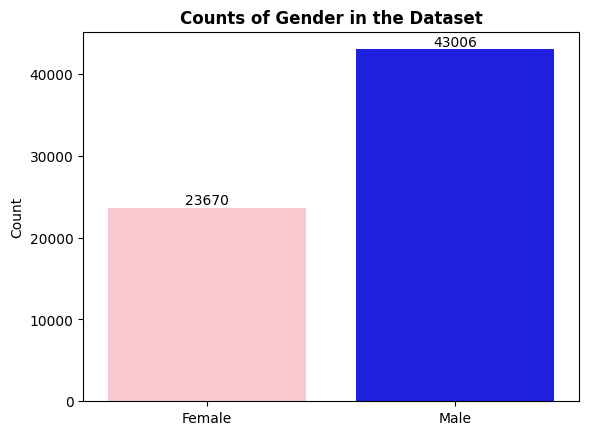

In [26]:
#Gender Ratio
gender_mapping = {0: 'Male', 1: 'Female'}
df['gender_label'] = df['gender'].map(gender_mapping)

ax = sns.countplot(x='gender_label', data=df, palette=['pink','blue'])

plt.xlabel('')
plt.ylabel('Count')
plt.title('Counts of Gender in the Dataset', fontweight = 'bold')

for i in ax.patches:
    ax.annotate(f'{int(i.get_height())}', (i.get_x() + i.get_width() / 2., i.get_height()),
                ha='center', va='bottom', color='black')

plt.show()

c:\Users\typjo\anaconda3\envs\DS160\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\typjo\anaconda3\envs\DS160\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\typjo\anaconda3\envs\DS160\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


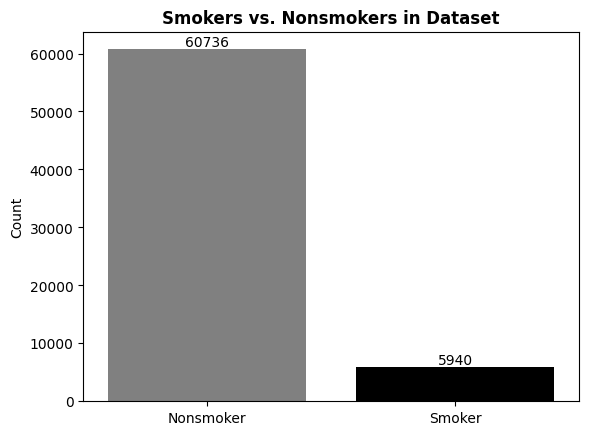

In [27]:
#Smoking Ratio
smoker_mapping = {0: 'Nonsmoker', 1: 'Smoker'}
df['smoker_label'] = df['smoke'].map(smoker_mapping)

ax = sns.countplot(x='smoker_label', data=df, palette=['grey','black'])

plt.xlabel('')
plt.ylabel('Count')
plt.title('Smokers vs. Nonsmokers in Dataset', fontweight = 'bold')

for i in ax.patches:
    ax.annotate(f'{int(i.get_height())}', (i.get_x() + i.get_width() / 2., i.get_height()),
                ha='center', va='bottom', color='black')

plt.show()

c:\Users\typjo\anaconda3\envs\DS160\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\typjo\anaconda3\envs\DS160\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\typjo\anaconda3\envs\DS160\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


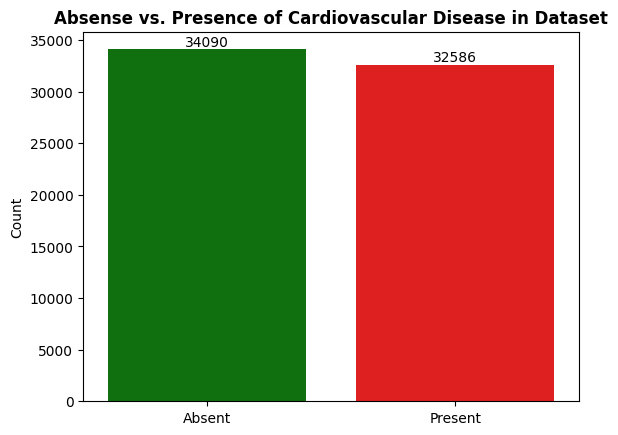

In [28]:
cardio_mapping = {0: 'Absent', 1: 'Present'}
df['cardio_label'] = df['cardio'].map(cardio_mapping)

ax = sns.countplot(x='cardio_label', data=df, palette=['green','red'])

plt.xlabel('')
plt.ylabel('Count')
plt.title('Absense vs. Presence of Cardiovascular Disease in Dataset', fontweight = 'bold')

for i in ax.patches:
    ax.annotate(f'{int(i.get_height())}', (i.get_x() + i.get_width() / 2., i.get_height()),
                ha='center', va='bottom', color='black')

plt.show()

c:\Users\typjo\anaconda3\envs\DS160\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\typjo\anaconda3\envs\DS160\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\typjo\anaconda3\envs\DS160\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


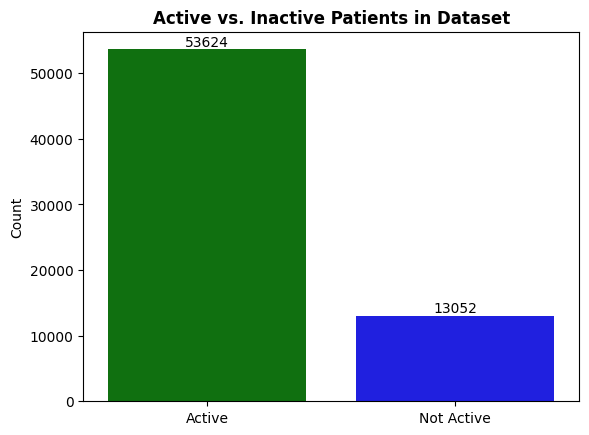

In [29]:
#Active Ratio
active_mapping = {0: 'Not Active', 1: 'Active'}
df['active_label'] = df['active'].map(active_mapping)

ax = sns.countplot(x='active_label', data=df, palette=['green','blue'])

plt.xlabel('')
plt.ylabel('Count')
plt.title('Active vs. Inactive Patients in Dataset', fontweight = 'bold')

for i in ax.patches:
    ax.annotate(f'{int(i.get_height())}', (i.get_x() + i.get_width() / 2., i.get_height()),
                ha='center', va='bottom', color='black')

plt.show()

c:\Users\typjo\anaconda3\envs\DS160\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\typjo\anaconda3\envs\DS160\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\typjo\anaconda3\envs\DS160\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


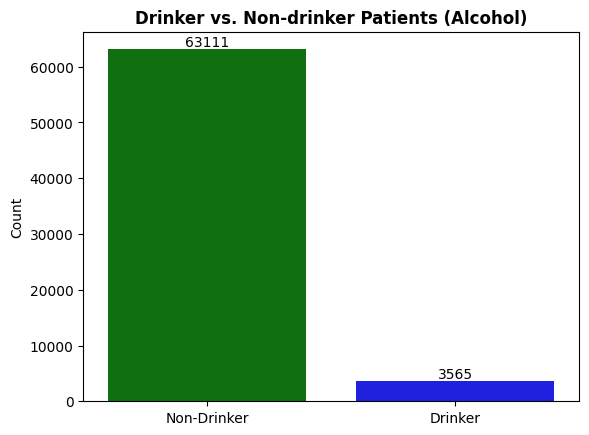

In [30]:
#Alcohol Ratio
alco_mapping = {0: 'Non-Drinker', 1: 'Drinker'}
df['alco_label'] = df['alco'].map(alco_mapping)

ax = sns.countplot(x='alco_label', data=df, palette=['green','blue'])

plt.xlabel('')
plt.ylabel('Count')
plt.title('Drinker vs. Non-drinker Patients (Alcohol)', fontweight = 'bold')

for i in ax.patches:
    ax.annotate(f'{int(i.get_height())}', (i.get_x() + i.get_width() / 2., i.get_height()),
                ha='center', va='bottom', color='black')

plt.show()

In [31]:
#removing the label columns (no longer needed)
df = df[df.columns.drop(list(df.filter(regex='label')))]

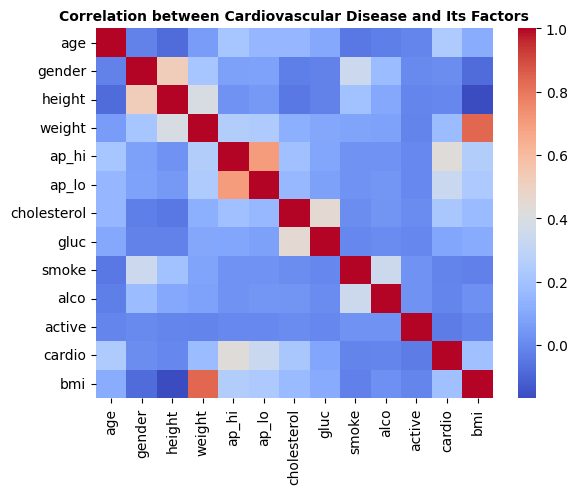

In [32]:
#examining the correlation between variables
corr = df.corr()

sns.heatmap(corr, cmap='coolwarm')
plt.title('Correlation between Cardiovascular Disease and Its Factors', fontsize = 10, fontweight = 'bold')
plt.show()

c:\Users\typjo\anaconda3\envs\DS160\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\typjo\anaconda3\envs\DS160\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


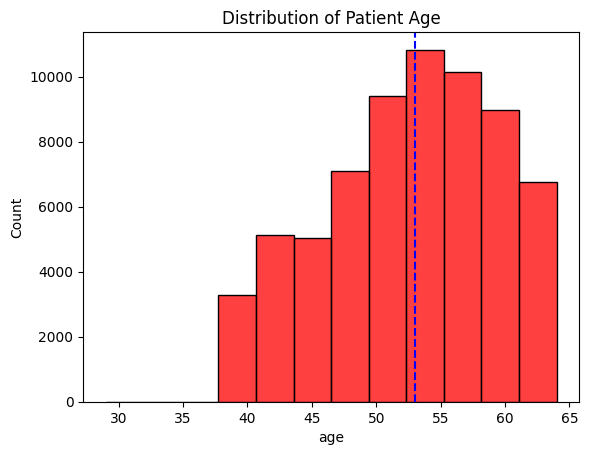

In [33]:
age_median = df['age'].median()

sns.histplot(data = df['age'], bins = 12, color = 'red')
plt.title('Distribution of Patient Age')
plt.axvline(age_median, color = 'blue', linestyle = '--')

plt.show()

c:\Users\typjo\anaconda3\envs\DS160\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\typjo\anaconda3\envs\DS160\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


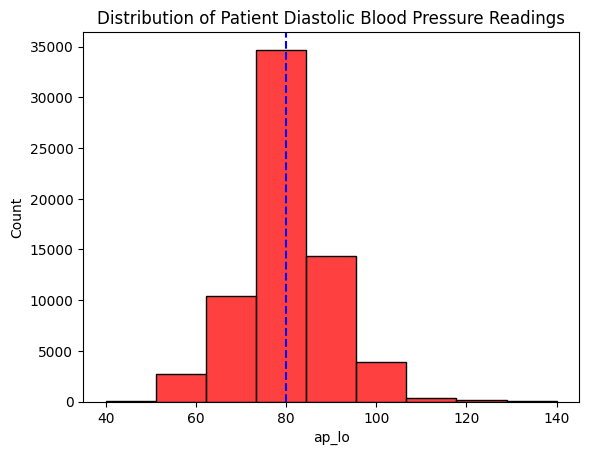

In [34]:
diastolic_median = df['ap_lo'].median()

sns.histplot(data = df['ap_lo'], bins = 9, color = 'red')
plt.title('Distribution of Patient Diastolic Blood Pressure Readings')
plt.axvline(diastolic_median, color = 'blue', linestyle='--')

plt.show()

c:\Users\typjo\anaconda3\envs\DS160\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\typjo\anaconda3\envs\DS160\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


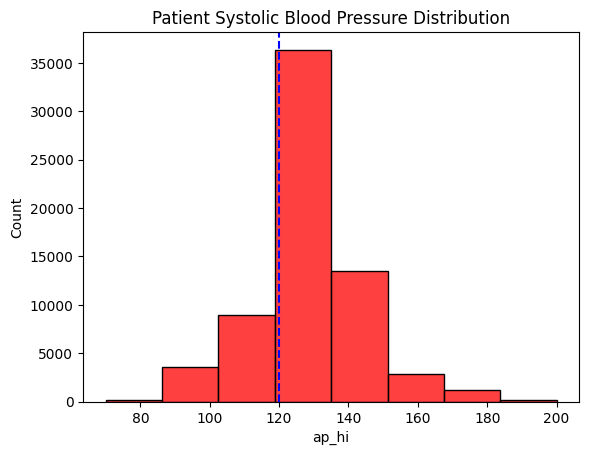

In [35]:
systolic_median = df['ap_hi'].median()
sns.histplot(data = df['ap_hi'], bins = 8, color = 'red')
plt.title('Patient Systolic Blood Pressure Distribution')
plt.axvline(systolic_median, color = 'blue', linestyle = '--')
plt.show()

c:\Users\typjo\anaconda3\envs\DS160\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\typjo\anaconda3\envs\DS160\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


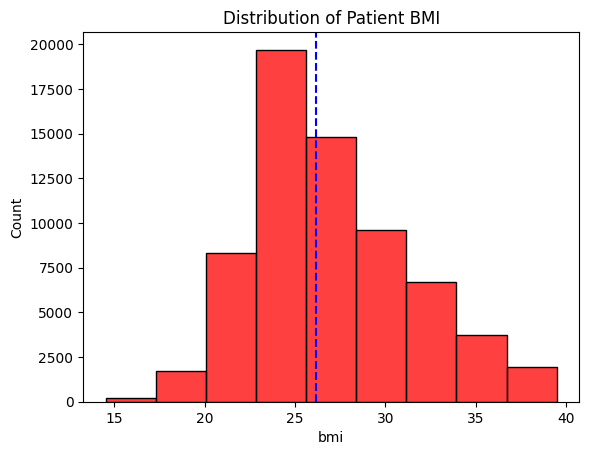

In [36]:
bmi_median = df['bmi'].median()

sns.histplot(data = df['bmi'], bins = 9, color = 'red')
plt.title('Distribution of Patient BMI')
plt.axvline(bmi_median, color = 'blue', linestyle = '--')

plt.show()

In [37]:
#creating a new csv file based on changes and using in Tableau
#df.to_csv('heart_data_updated.csv')

# Model Building

## Logistic Regression Model

In [38]:
X = df.drop('cardio',axis = 1)
y = df[['cardio']]
X.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,bmi
0,50,1,168,62.0,110,80,1,1,0,0,1,21.97
1,55,0,156,85.0,140,90,3,1,0,0,1,34.93
2,51,0,165,64.0,130,70,3,1,0,0,0,23.51
3,48,1,169,82.0,150,100,1,1,0,0,1,28.71
4,47,0,156,56.0,100,60,1,1,0,0,0,23.01


In [39]:
y.head()

,cardio
0,0
1,1
2,1
3,1
4,0


In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size = .33,
                                                   random_state = 0)

In [41]:
classifier=LogisticRegression(max_iter=1000)
classifier.fit(X_train.values,y_train.values.ravel())

LogisticRegression(max_iter=1000)

In [42]:
y_pred = classifier.predict(X_test.values)

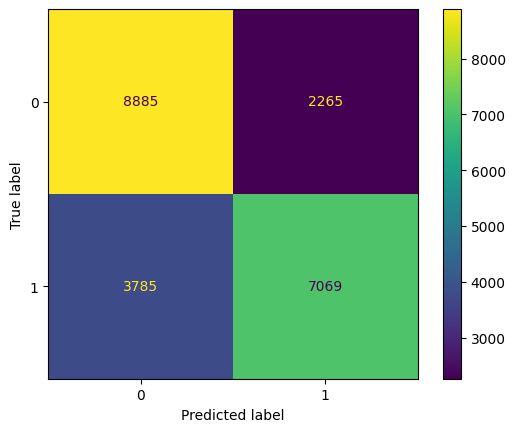

[[8885 2265]
 [3785 7069]]


In [43]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
print(cm)

In [44]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.80      0.75     11150
           1       0.76      0.65      0.70     10854

    accuracy                           0.73     22004
   macro avg       0.73      0.72      0.72     22004
weighted avg       0.73      0.73      0.72     22004



## k-Nearest Neighbors Model

Some important things to note about KNN:
- It assumes that the closer points are in the feature space, the more similar they are to each other
- It treats all factors equally prior to weights being added (If I were to add weights, I would need to do more research on the features of the dataset in order to prevent accidentally introducing bias)
- It assumes that the dataset is noise free (We took care of this already)

In [45]:
#Importing Necessary Libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics 

This model will be using get dummies for cholesterol and glucose columns since they are represented as 1-3 (normal, elevated, high).

In [46]:
#Using dummies to convert ordinal glucose and cholesterol to 0 and 1s
gluc_dummies = pd.get_dummies(df['gluc'], prefix='gluc')
cholesterol_dummies = pd.get_dummies(df['cholesterol'], prefix='cholesterol')

#dummies saved as true false so need to convert to 1/0
gluc_dummies = gluc_dummies.astype(int)
cholesterol_dummies = cholesterol_dummies.astype(int)

df = df.drop(['gluc', 'cholesterol'], axis=1)
df = pd.concat([df, gluc_dummies, cholesterol_dummies], axis=1)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7, test_size=0.20)

In [48]:
print(math.sqrt(len(y)))

258.21696303690044


In [53]:
k = 257  
knn = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
y_pred = knn.predict(X_test)
print("Accuracy of model at K=257 is",metrics.accuracy_score(y_test, y_pred))

c:\Users\typjo\anaconda3\envs\DS160\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy of model at K=257 is 0.7245800839832034


In selecting the K for the K-Nearest Neighbor model, the general guideline of taking the square root of the amount of data points was followed, making sure to make it an odd number to avoid any troubles (the dataset is likely too large for this rule to have an impact)

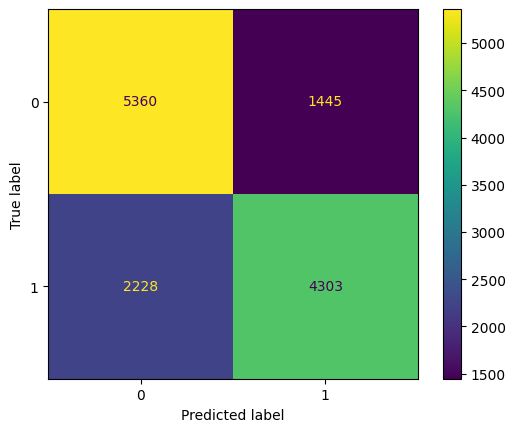

[[5360 1445]
 [2228 4303]]


In [50]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
print(cm)

In [51]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.79      0.74      6805
           1       0.75      0.66      0.70      6531

    accuracy                           0.72     13336
   macro avg       0.73      0.72      0.72     13336
weighted avg       0.73      0.72      0.72     13336



#### Breaking down the results of the model, 

Accuracy:
   
    The accuracy of this first model was 72%, not the greatest. We will look at seeing how outliers affect the model next. This model doesn't seem to be the worst fit, but we can probably do better, either by tuning this model or by using a different type of model

F1 Score, Precision, Recall:

    The F1 score shows that the model is slightly better for the 0 class's balance between precision and recall (absence of cvd), and for the 1 class the model is slightly less precise at doing so.

    Given the situation of medical diagnostics, the recall for the 1 class (presence of cardiovascular disease) is concerning because it suggests that 34% of predictions result in a false negative. The amount of false negatives in a medical model is extremely important to look out for because you want to catch the disease before it is too late for the patient.

###### Resources

K-Nearest Neighbors:
<ul>
    <li><a href="https://medium.com/swlh/k-nearest-neighbor-ca2593d7a3c4">KNN Medium Article </a> </li>
    <li> <a href="https://www.geeksforgeeks.org/k-nearest-neighbours/">GeeksForGeeks Article </a></li>
    <li> <a href="https://www.youtube.com/watch?v=4HKqjENq9OU">KNN Similearn YouTube Video </a></li>
</ul>
